In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# Fake data
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [3]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [7]:
# Model fit and summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.437e+06
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          1.24e-245
Time:                        00:14:09   Log-Likelihood:                -131.47
No. Observations:                 100   AIC:                             268.9
Df Residuals:                      97   BIC:                             276.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9481      0.269      3.524      0.0

In [8]:
print("R2: ", res.rsquared)

R2:  0.9999910791623945


## OLS non-linear curve but linear in parameters

In [9]:
# Fake data 1
nsample = 100
sig = 0.5
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
e = np.random.normal(size=nsample)

In [12]:
res_2 = sm.OLS(y, X).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     327.8
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           2.69e-50
Time:                        00:18:25   Log-Likelihood:                -65.291
No. Observations:                 100   AIC:                             138.6
Df Residuals:                      96   BIC:                             149.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5034      0.016     30.830      0.0

In [15]:
print("R2: ", res_2.rsquared)
print("Std err: ", res_2.bse)
print("Pred values: ", res_2.predict(X))
print("R squared: ", res_2.rsquared)

R2:  0.911073542348285
Std err:  [0.01632802 0.07838236 0.00683309 0.10813273]
Pred values:  [4.29098365 4.43697751 4.58168668 4.72446204 4.86466775 5.00168777
 5.13493211 5.26384288 5.38789993 5.50662622 5.61959259 5.72642224
 5.82679448 5.92044807 6.00718381 6.08686667 6.15942705 6.22486159
 6.28323314 6.33467015 6.37936536 6.41757381 6.44961027 6.47584601
 6.49670504 6.51265976 6.52422615 6.53195853 6.53644388 6.53829587
 6.53814863 6.53665022 6.5344561  6.53222239 6.53059922 6.53022406
 6.53171526 6.53566575 6.54263695 6.55315308 6.56769584 6.58669942
 6.61054618 6.63956264 6.67401626 6.71411261 6.75999338 6.81173483
 6.86934709 6.93277403 7.00189383 7.0765202  7.15640435 7.24123744
 7.33065378 7.42423455 7.52151207 7.62197454 7.72507131 7.83021845
 7.93680471 8.04419777 8.15175067 8.2588084  8.36471462 8.46881827
 8.5704803  8.6690801  8.76402191 8.85474081 8.94070853 9.02143885
 9.09649251 9.16548169 9.22807402 9.28399591 9.33303537 9.37504414
 9.40993926 9.43770384 9.45838729 9.

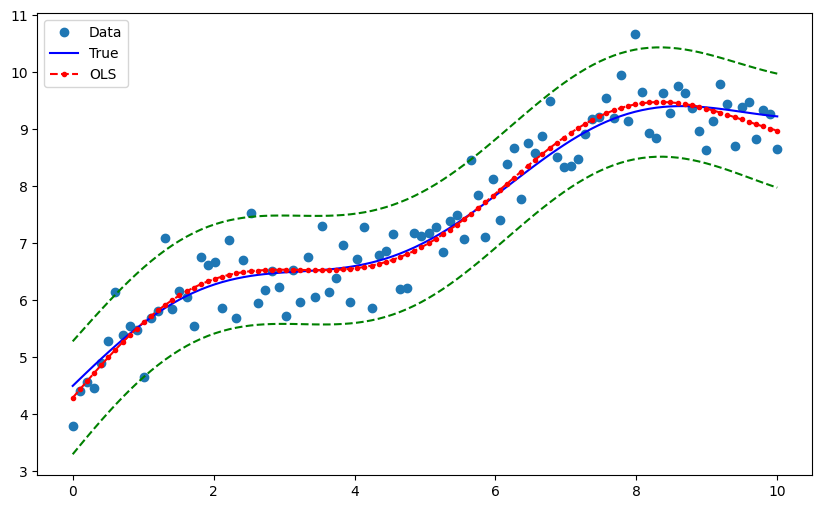

In [18]:
def plot_results(res, X, y, y_true):
    prstd, iv_l, iv_u = wls_prediction_std(res)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(X[:, 0], y, 'o', label="Data")
    ax.plot(X[:, 0], y_true, 'b-', label="True")
    ax.plot(X[:, 0], res.fittedvalues, 'r--.', label="OLS")
    ax.plot(X[:, 0], iv_u, 'g--')
    ax.plot(X[:, 0], iv_l, 'g--')
    ax.legend(loc='best')

    plt.show()

plot_results(res_2, X, y, y_true)

In [20]:
X[:, 0]

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96